# Agenda
* Pandas
* Lab


# Introduction


## Create a new notebook for your code-along:

From our submission directory, type:
    
    jupyter notebook

From the IPython Dashboard, open a new notebook.
Change the title to: "Numpy and Pandas"

## Numpy Overview

* Why Python for Data? Numpy brings *decades* of C math into Python!
* Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [10]:
import numpy as np

# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview

_Source: [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/10min.html)_

In [11]:
import pandas as pd
import math

import matplotlib.pyplot as plt

In [2]:
pd.date_range?

In [12]:
dates = pd.date_range('20140101',periods=6)
dates

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
df1 = pd.DataFrame(np.random.randn(6,4),columns=list('ABCD'))
df1

A         B         C         D
0  1.091496 -1.505743  0.124805 -1.503877
1 -0.176004  0.380974 -0.626497  0.926559
2 -0.442520  1.889319  1.134539 -1.624861
3  0.328998  0.587743  0.065420 -0.989017
4  1.658502  0.922790  0.856237 -0.282184
5 -1.001742  1.038316 -0.183101  0.894963

In [14]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
# z = pd.DataFrame(index = df.index, columns = df.columns)
df.head()

A         B         C         D
2014-01-01  0.646560 -1.445294  0.363947 -0.313446
2014-01-02  0.568653 -0.772643  0.016126 -0.968974
2014-01-03  0.131496  0.451900 -0.899401  0.774813
2014-01-04 -0.565385  0.563360  0.532687  0.690664
2014-01-05 -0.789530  0.444108  0.779218  1.237536

In [15]:
# Index, columns, underlying numpy data
df.T
df.shape

(6, 4)

In [16]:
df2 = pd.DataFrame({ 'A' : 1.,
                         'B' : pd.Timestamp('20130102'),
                         'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                         'D' : np.array([3] * 4,dtype='int32'),
                         'E' : 'foo' })
    

df2

A          B    C  D    E
0  1.0 2013-01-02  1.0  3  foo
1  1.0 2013-01-02  1.0  3  foo
2  1.0 2013-01-02  1.0  3  foo
3  1.0 2013-01-02  1.0  3  foo

In [17]:
# With specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

#### Viewing Data

In [18]:
df.head()

A         B         C         D
2014-01-01  0.646560 -1.445294  0.363947 -0.313446
2014-01-02  0.568653 -0.772643  0.016126 -0.968974
2014-01-03  0.131496  0.451900 -0.899401  0.774813
2014-01-04 -0.565385  0.563360  0.532687  0.690664
2014-01-05 -0.789530  0.444108  0.779218  1.237536

In [19]:
df.tail()

A         B         C         D
2014-01-02  0.568653 -0.772643  0.016126 -0.968974
2014-01-03  0.131496  0.451900 -0.899401  0.774813
2014-01-04 -0.565385  0.563360  0.532687  0.690664
2014-01-05 -0.789530  0.444108  0.779218  1.237536
2014-01-06  1.472625  0.866692  0.056133 -0.017695

In [20]:
df.describe()

A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.244070  0.018020  0.141451  0.233816
std    0.838203  0.911469  0.585777  0.814653
min   -0.789530 -1.445294 -0.899401 -0.968974
25%   -0.391165 -0.468455  0.026128 -0.239509
50%    0.350075  0.448004  0.210040  0.336484
75%    0.627083  0.535495  0.490502  0.753776
max    1.472625  0.866692  0.779218  1.237536

In [22]:
newdf= df.sort_values(by='A')
print(newdf)

                   A         B         C         D
2014-01-05 -0.789530  0.444108  0.779218  1.237536
2014-01-04 -0.565385  0.563360  0.532687  0.690664
2014-01-03  0.131496  0.451900 -0.899401  0.774813
2014-01-02  0.568653 -0.772643  0.016126 -0.968974
2014-01-01  0.646560 -1.445294  0.363947 -0.313446
2014-01-06  1.472625  0.866692  0.056133 -0.017695


### Selection

In [23]:
df[["A","D"]]

A         D
2014-01-01  0.646560 -0.313446
2014-01-02  0.568653 -0.968974
2014-01-03  0.131496  0.774813
2014-01-04 -0.565385  0.690664
2014-01-05 -0.789530  1.237536
2014-01-06  1.472625 -0.017695

In [24]:
df.head()

A         B         C         D
2014-01-01  0.646560 -1.445294  0.363947 -0.313446
2014-01-02  0.568653 -0.772643  0.016126 -0.968974
2014-01-03  0.131496  0.451900 -0.899401  0.774813
2014-01-04 -0.565385  0.563360  0.532687  0.690664
2014-01-05 -0.789530  0.444108  0.779218  1.237536

In [25]:
df[["A", "B"]]

A         B
2014-01-01  0.646560 -1.445294
2014-01-02  0.568653 -0.772643
2014-01-03  0.131496  0.451900
2014-01-04 -0.565385  0.563360
2014-01-05 -0.789530  0.444108
2014-01-06  1.472625  0.866692

In [26]:
df[:]

A         B         C         D
2014-01-01  0.646560 -1.445294  0.363947 -0.313446
2014-01-02  0.568653 -0.772643  0.016126 -0.968974
2014-01-03  0.131496  0.451900 -0.899401  0.774813
2014-01-04 -0.565385  0.563360  0.532687  0.690664
2014-01-05 -0.789530  0.444108  0.779218  1.237536
2014-01-06  1.472625  0.866692  0.056133 -0.017695

In [27]:
# By label
df.loc[dates[0]]

A    0.646560
B   -1.445294
C    0.363947
D   -0.313446
Name: 2014-01-01 00:00:00, dtype: float64

In [28]:
# multi-axis by label
df.loc[:,['A','B']]

A         B
2014-01-01  0.646560 -1.445294
2014-01-02  0.568653 -0.772643
2014-01-03  0.131496  0.451900
2014-01-04 -0.565385  0.563360
2014-01-05 -0.789530  0.444108
2014-01-06  1.472625  0.866692

In [29]:
# Date Range
df.loc['20140102':'20140104',['B']]

B
2014-01-02 -0.772643
2014-01-03  0.451900
2014-01-04  0.563360

In [30]:
# Fast access to scalar
df.at[dates[1],'B']

-0.7726433664630721

In [31]:
# iloc provides integer locations based on location
df.iloc[3:]

A         B         C         D
2014-01-04 -0.565385  0.563360  0.532687  0.690664
2014-01-05 -0.789530  0.444108  0.779218  1.237536
2014-01-06  1.472625  0.866692  0.056133 -0.017695

### Boolean Indexing

In [32]:
bool = df[df['A'] < 0] # Basically a 'where' operation
bool

A         B         C         D
2014-01-04 -0.565385  0.563360  0.532687  0.690664
2014-01-05 -0.789530  0.444108  0.779218  1.237536

### Missing Data

In [33]:
# Add a column with missing data
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [34]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [35]:
df1

A         B         C         D    E
2014-01-01  0.646560 -1.445294  0.363947 -0.313446  1.0
2014-01-02  0.568653 -0.772643  0.016126 -0.968974  1.0
2014-01-03  0.131496  0.451900 -0.899401  0.774813  NaN
2014-01-04 -0.565385  0.563360  0.532687  0.690664  NaN

In [36]:
# find where values are null
pd.isnull(df1)

A      B      C      D      E
2014-01-01  False  False  False  False  False
2014-01-02  False  False  False  False  False
2014-01-03  False  False  False  False   True
2014-01-04  False  False  False  False   True

In [37]:
#get a quick summary of columns with missing data 
df1.isnull().sum()

A    0
B    0
C    0
D    0
E    2
dtype: int64

In [38]:
#replace a null value with a new value 
fill = df1.fillna(999)
fill

A         B         C         D      E
2014-01-01  0.646560 -1.445294  0.363947 -0.313446    1.0
2014-01-02  0.568653 -0.772643  0.016126 -0.968974    1.0
2014-01-03  0.131496  0.451900 -0.899401  0.774813  999.0
2014-01-04 -0.565385  0.563360  0.532687  0.690664  999.0

In [39]:
#drop null values
drop = df1.dropna()
drop

A         B         C         D    E
2014-01-01  0.646560 -1.445294  0.363947 -0.313446  1.0
2014-01-02  0.568653 -0.772643  0.016126 -0.968974  1.0

### Operations

In [40]:
df.describe()

A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.244070  0.018020  0.141451  0.233816
std    0.838203  0.911469  0.585777  0.814653
min   -0.789530 -1.445294 -0.899401 -0.968974
25%   -0.391165 -0.468455  0.026128 -0.239509
50%    0.350075  0.448004  0.210040  0.336484
75%    0.627083  0.535495  0.490502  0.753776
max    1.472625  0.866692  0.779218  1.237536

### Applying functions

In [41]:
df

A         B         C         D
2014-01-01  0.646560 -1.445294  0.363947 -0.313446
2014-01-02  0.568653 -0.772643  0.016126 -0.968974
2014-01-03  0.131496  0.451900 -0.899401  0.774813
2014-01-04 -0.565385  0.563360  0.532687  0.690664
2014-01-05 -0.789530  0.444108  0.779218  1.237536
2014-01-06  1.472625  0.866692  0.056133 -0.017695

In [42]:
df.apply(np.cumsum)

A         B         C         D
2014-01-01  0.646560 -1.445294  0.363947 -0.313446
2014-01-02  1.215213 -2.217938  0.380073 -1.282421
2014-01-03  1.346709 -1.766038 -0.519328 -0.507608
2014-01-04  0.781324 -1.202677  0.013358  0.183057
2014-01-05 -0.008206 -0.758569  0.792576  1.420593
2014-01-06  1.464418  0.108123  0.848709  1.402898

### Advanced List Comprehensions: 
Learn more about list comprehensions [here](http://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)

In [43]:
df.apply(lambda x: x.max() - x.min())

A    2.262155
B    2.311986
C    1.678620
D    2.206511
dtype: float64

## Built in string methods

In [44]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [45]:
#try making this uppercase 
s.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object

### Merge

In [46]:
np.random.randn(10,4)

array([[-0.33292833,  1.10692806,  0.13499255, -0.53797553],
       [ 0.50603036, -0.10454455, -1.32350871, -0.80007115],
       [-0.33420056,  0.3522805 , -0.92985277,  0.5987731 ],
       [-0.13425673, -1.13886689, -1.46430155,  1.36097499],
       [-0.8302356 ,  0.4056197 , -0.0614746 , -0.46901047],
       [ 0.32524846,  1.00493787,  0.10827028, -0.77233696],
       [-0.3847695 ,  0.97862498,  0.37870603, -0.04339476],
       [-0.58680909, -1.2006505 , -0.25350292,  1.03107739],
       [-0.50482703, -0.0801313 ,  0.51048412,  1.40203604],
       [-0.51757464, -0.75264495,  0.1435749 ,  1.32092164]])

In [47]:
#Concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10,4))
df

0         1         2         3
0 -1.251340 -0.532673 -0.161600  1.491451
1 -0.717490 -0.605297  0.014783 -0.844256
2 -1.802801 -0.584992 -0.266928 -0.524802
3  1.182814  1.050891 -1.325660  0.918085
4 -0.514041  1.277504 -0.409336 -0.397727
5 -1.122526 -0.791847  0.229171  0.100545
6  0.162707  1.012833 -0.864076 -0.004678
7  1.176376  0.328335  0.478630  0.672873
8  0.081560  0.502678 -0.264603 -1.544323
9  1.749418 -0.532652 -1.513665 -0.376305

In [48]:
# Break it into pieces
pieces = [df[:3], df[3:7],df[7:]]
pieces

[          0         1         2         3
 0 -1.251340 -0.532673 -0.161600  1.491451
 1 -0.717490 -0.605297  0.014783 -0.844256
 2 -1.802801 -0.584992 -0.266928 -0.524802,
           0         1         2         3
 3  1.182814  1.050891 -1.325660  0.918085
 4 -0.514041  1.277504 -0.409336 -0.397727
 5 -1.122526 -0.791847  0.229171  0.100545
 6  0.162707  1.012833 -0.864076 -0.004678,
           0         1         2         3
 7  1.176376  0.328335  0.478630  0.672873
 8  0.081560  0.502678 -0.264603 -1.544323
 9  1.749418 -0.532652 -1.513665 -0.376305]

In [49]:
# Also can "Join" and "Append"
df

0         1         2         3
0 -1.251340 -0.532673 -0.161600  1.491451
1 -0.717490 -0.605297  0.014783 -0.844256
2 -1.802801 -0.584992 -0.266928 -0.524802
3  1.182814  1.050891 -1.325660  0.918085
4 -0.514041  1.277504 -0.409336 -0.397727
5 -1.122526 -0.791847  0.229171  0.100545
6  0.162707  1.012833 -0.864076 -0.004678
7  1.176376  0.328335  0.478630  0.672873
8  0.081560  0.502678 -0.264603 -1.544323
9  1.749418 -0.532652 -1.513665 -0.376305

### Grouping


In [50]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [51]:
df

A      B         C         D
0  foo    one  0.346313  1.173770
1  bar    one  0.143190  1.925855
2  foo    two  1.047915 -0.359762
3  bar  three -2.863528 -0.319181
4  foo    two -1.342200  0.183388
5  bar    two  0.604168  0.363757
6  foo    one  1.709549  0.125386
7  foo  three  0.538350 -1.173719

In [52]:
df.groupby(['A','C']).count()

B  D
A   C              
bar -2.863528  1  1
     0.143190  1  1
     0.604168  1  1
foo -1.342200  1  1
     0.346313  1  1
     0.538350  1  1
     1.047915  1  1
     1.709549  1  1

### Reshaping

In [43]:
# You can also stack or unstack levels

In [53]:
a = df.groupby(['A','B']).sum()

In [54]:
# Pivot Tables
pd.pivot_table(df,values=['C','D'],index=['A'],columns=['B'])

C                             D                    
B         one     three       two       one     three       two
A                                                              
bar  0.143190 -2.863528  0.604168  1.925855 -0.319181  0.363757
foo  1.027931  0.538350 -0.147143  0.649578 -1.173719 -0.088187

### Time Series


In [55]:
import pandas as pd
import numpy as np

In [56]:
# 100 Seconds starting on January 1st
rng = pd.date_range('1/1/2014', periods=100, freq='S')

In [57]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [58]:
ts

2014-01-01 00:00:00    351
2014-01-01 00:00:01     28
2014-01-01 00:00:02    200
2014-01-01 00:00:03    363
2014-01-01 00:00:04    373
2014-01-01 00:00:05    284
2014-01-01 00:00:06    495
2014-01-01 00:00:07     87
2014-01-01 00:00:08     34
2014-01-01 00:00:09     58
2014-01-01 00:00:10    285
2014-01-01 00:00:11    340
2014-01-01 00:00:12    432
2014-01-01 00:00:13    291
2014-01-01 00:00:14     59
2014-01-01 00:00:15    101
2014-01-01 00:00:16    120
2014-01-01 00:00:17    225
2014-01-01 00:00:18    290
2014-01-01 00:00:19    418
2014-01-01 00:00:20    420
2014-01-01 00:00:21     90
2014-01-01 00:00:22    130
2014-01-01 00:00:23      9
2014-01-01 00:00:24    386
2014-01-01 00:00:25    434
2014-01-01 00:00:26    241
2014-01-01 00:00:27    281
2014-01-01 00:00:28    202
2014-01-01 00:00:29    124
                      ... 
2014-01-01 00:01:10    425
2014-01-01 00:01:11    387
2014-01-01 00:01:12    243
2014-01-01 00:01:13    254
2014-01-01 00:01:14    315
2014-01-01 00:01:15    404
2

In [59]:
# Built in resampling
ts.resample('1Min').mean() # Resample secondly to 1Minutely

2014-01-01 00:00:00    244.016667
2014-01-01 00:01:00    230.400000
Freq: T, dtype: float64

In [60]:
# Many additional time series features
ts.#use tab

SyntaxError: invalid syntax (<ipython-input-60-5da9d1052201>, line 2)

### Plotting


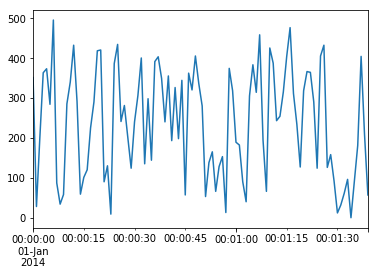

In [61]:
ts.plot()

In [62]:
def randwalk(startdate,points):
    ts = pd.Series(np.random.randn(points), index=pd.date_range(startdate, periods=points))
    ts=ts.cumsum()
    ts.plot()
    return(ts)

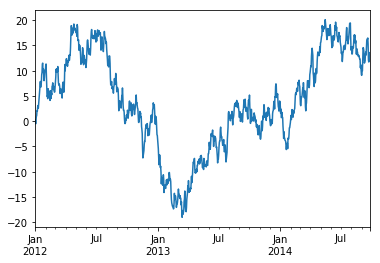

In [63]:
# Using pandas to make a simple random walker by repeatedly running:
a=randwalk('1/1/2012',1000)

In [ ]:
# Pandas plot function will print with labels as default

<Figure size 432x288 with 0 Axes>

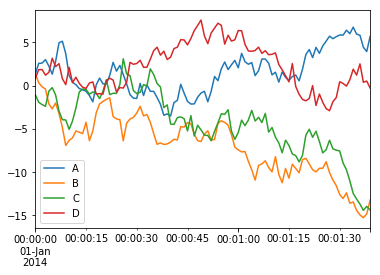

In [64]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure();df.plot();plt.legend(loc='best') #

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

#### The benefits of open source:

Let's look under x's in plt modules

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/10min.html) | Wes & Company's selection of tutorials and lectures
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas